In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
file_path = r"C:\Users\ADMIN\Desktop\X-caliber\smaple_data.csv"  
data = pd.read_csv(file_path)

In [16]:
# Select relevant features for clustering
features = ["credit_limit", "yearly_income", "total_debt", "credit_score", "num_credit_cards"]
X = data[features]


In [17]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


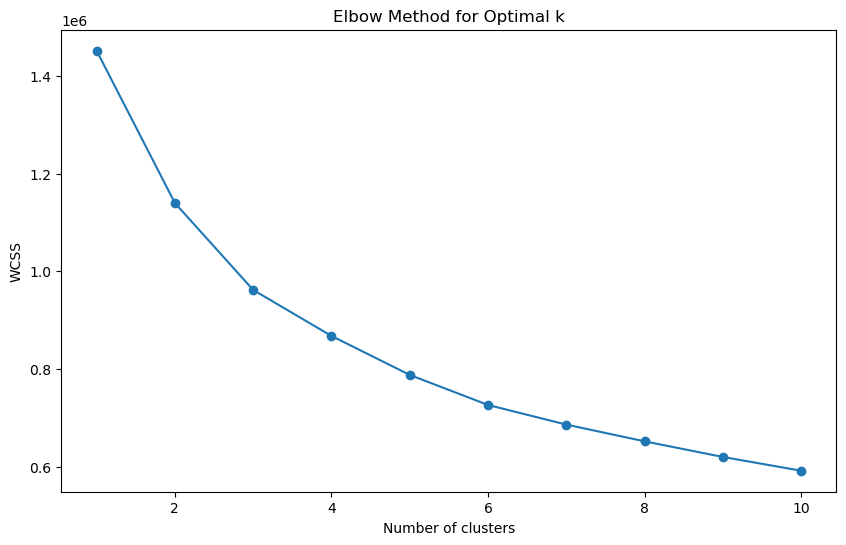

In [19]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## Observation:
## -optimal cluster number is 3


In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [ ]:
# Add cluster labels to the original dataset
data['Cluster'] = clusters


In [ ]:
# Analyze and visualize clusters (optional)
print(data.groupby('Cluster')[features].mean())

# Visualizing two features (e.g., credit_limit vs yearly_income) with clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(
        X_scaled[clusters == cluster, 0], 
        X_scaled[clusters == cluster, 1], 
        label=f'Cluster {cluster}'
    )
plt.title('Clusters Visualization')
plt.xlabel('Credit Limit (scaled)')
plt.ylabel('Yearly Income (scaled)')
plt.legend()
plt.show()